# QBO Customer Bank Transaction Type Prediction

## Focus on predicting Rent, Payroll, Utilities for this project

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
# load data
# data source: qbf_ds.fact_qbo_transaction
#              ued_qbo_dwh.ofxtransactions_vw
# above two tables are joined on txn_id, and we took transactions with transaction date from 2019/04 to 2019/11


df = pd.read_csv("qbo.csv")

In [4]:
df.head()

,t1.company_id,t1.customer_id,t1.ofx_txn_id,t1.tx_id,t1.tx_date,t1.due_date,t1.paid_date,t1.amount,t1.raw_amount,t1.first_charge_date,...,t1.src_create_date,t1.created_date,t2.company_id,t2.txn_id,t2.ofx_memo,t2.ofx_payee,t2.create_date,t2.last_modify_date,t2.cleaned_up_payee,t2.cat_category
0,51222621.0,NaN,9622.0,135905.0,2019-08-13 07:00:00.0,NaN,NaN,17.11,-1.711000e+08,2001-12-01,...,2019-09-25 21:43:37.0,2019-12-01 23:04:35.324,51222621.0,9622.0,NaN,"HIGHTAIL - 669-222-8281, CA",2019-09-25 20:58:51.0,2019-09-25 21:43:37.0,Hightail Ca,Computer
1,51222630.0,NaN,9301.0,26834.0,2019-07-30 07:00:00.0,NaN,NaN,-13000.00,-1.300000e+11,2001-12-01,...,2019-08-03 22:34:40.0,2019-12-01 23:04:35.324,51222630.0,9301.0,NaN,OUTGOING FEDWIRE TRANSFER - MANU,2019-07-31 18:09:27.0,2019-08-03 23:57:49.0,Outgoing Fedwire Transfer,Intercam Banco
2,51224444.0,NaN,619.0,11643.0,2019-10-03 07:00:00.0,NaN,NaN,182.71,-1.827100e+09,2009-05-14,...,2019-11-15 21:47:10.0,2019-12-01 23:04:35.324,51224444.0,619.0,NaN,BCY*BACKCOUNTRY.COM,2019-10-05 05:58:58.0,2019-11-15 21:47:10.0,Backcountry,Returned Stuff
3,51301701.0,1174.0,23808.0,76424.0,2019-06-18 07:00:00.0,NaN,NaN,15377.00,1.537700e+11,2001-12-01,...,2019-06-25 01:01:00.0,2019-12-01 23:04:35.324,51301701.0,23808.0,PREAUTHORIZED ACH CREDIT HOMEWISEDOCS.COM/PAYA...,HOMEWISEDOCS.COM/PAY,2019-06-25 00:57:03.0,2019-06-25 01:01:00.0,Homewisedocs.com Payables Crummack,Income
4,51301701.0,2000.0,24046.0,76945.0,2019-07-22 07:00:00.0,NaN,NaN,1575.00,1.575000e+10,2001-12-01,...,2019-07-26 18:38:49.0,2019-12-01 23:04:35.324,51301701.0,24046.0,DEPOSIT REMOTE CAPTURE DEPOSIT,20190722-000000005250259670944,2019-07-26 18:36:00.0,2019-07-26 18:38:49.0,Deposit Remote Capture,1200 - Management Fees Due


In [5]:
df.shape

(558192, 21)

In [8]:
# clean up columns to make it more readable
print(list(df.columns))

['t1.company_id', 't1.customer_id', 't1.ofx_txn_id', 't1.tx_id', 't1.tx_date', 't1.due_date', 't1.paid_date', 't1.amount', 't1.raw_amount', 't1.first_charge_date', 't1.src_last_updated_date', 't1.src_create_date', 't1.created_date', 't2.company_id', 't2.txn_id', 't2.ofx_memo', 't2.ofx_payee', 't2.create_date', 't2.last_modify_date', 't2.cleaned_up_payee', 't2.cat_category']


In [9]:
columns = ['company_id', 'customer_id', 't1.ofx_txn_id', 't1.tx_id', 'tx_date',
           'due_date', 'paid_date', 'amount', 'raw_amount', 'first_charge_date', 
           'src_last_updated_date', 'src_create_date', 'created_date', 't2.company_id',
           't2.txn_id', 'ofx_memo', 'ofx_payee', 't2.create_date', 'last_modify_date', 
           'cleaned_up_payee', 'category']

In [10]:
df.columns = columns

In [11]:
df.head()

,company_id,customer_id,t1.ofx_txn_id,t1.tx_id,tx_date,due_date,paid_date,amount,raw_amount,first_charge_date,...,src_create_date,created_date,t2.company_id,t2.txn_id,ofx_memo,ofx_payee,t2.create_date,last_modify_date,cleaned_up_payee,category
0,51222621.0,NaN,9622.0,135905.0,2019-08-13 07:00:00.0,NaN,NaN,17.11,-1.711000e+08,2001-12-01,...,2019-09-25 21:43:37.0,2019-12-01 23:04:35.324,51222621.0,9622.0,NaN,"HIGHTAIL - 669-222-8281, CA",2019-09-25 20:58:51.0,2019-09-25 21:43:37.0,Hightail Ca,Computer
1,51222630.0,NaN,9301.0,26834.0,2019-07-30 07:00:00.0,NaN,NaN,-13000.00,-1.300000e+11,2001-12-01,...,2019-08-03 22:34:40.0,2019-12-01 23:04:35.324,51222630.0,9301.0,NaN,OUTGOING FEDWIRE TRANSFER - MANU,2019-07-31 18:09:27.0,2019-08-03 23:57:49.0,Outgoing Fedwire Transfer,Intercam Banco
2,51224444.0,NaN,619.0,11643.0,2019-10-03 07:00:00.0,NaN,NaN,182.71,-1.827100e+09,2009-05-14,...,2019-11-15 21:47:10.0,2019-12-01 23:04:35.324,51224444.0,619.0,NaN,BCY*BACKCOUNTRY.COM,2019-10-05 05:58:58.0,2019-11-15 21:47:10.0,Backcountry,Returned Stuff
3,51301701.0,1174.0,23808.0,76424.0,2019-06-18 07:00:00.0,NaN,NaN,15377.00,1.537700e+11,2001-12-01,...,2019-06-25 01:01:00.0,2019-12-01 23:04:35.324,51301701.0,23808.0,PREAUTHORIZED ACH CREDIT HOMEWISEDOCS.COM/PAYA...,HOMEWISEDOCS.COM/PAY,2019-06-25 00:57:03.0,2019-06-25 01:01:00.0,Homewisedocs.com Payables Crummack,Income
4,51301701.0,2000.0,24046.0,76945.0,2019-07-22 07:00:00.0,NaN,NaN,1575.00,1.575000e+10,2001-12-01,...,2019-07-26 18:38:49.0,2019-12-01 23:04:35.324,51301701.0,24046.0,DEPOSIT REMOTE CAPTURE DEPOSIT,20190722-000000005250259670944,2019-07-26 18:36:00.0,2019-07-26 18:38:49.0,Deposit Remote Capture,1200 - Management Fees Due


In [34]:
# check null values
df.isnull().sum()

company_id                    0
customer_id              503405
t1.ofx_txn_id                 0
t1.tx_id                      0
tx_date                       0
due_date                 558192
paid_date                558192
amount                        0
raw_amount                    0
first_charge_date             0
src_last_updated_date         0
src_create_date               0
created_date                  0
t2.company_id                 0
t2.txn_id                     0
ofx_memo                 339737
ofx_payee                   385
t2.create_date                0
last_modify_date              0
cleaned_up_payee            774
category                    960
cat                           0
dtype: int64

In [39]:
# drop the rows if category is null
# can drop more rows if column value is null

df = df.dropna(subset=['category'])

In [40]:
# validate
df.isnull().sum()

company_id                    0
customer_id              502605
t1.ofx_txn_id                 0
t1.tx_id                      0
tx_date                       0
due_date                 557232
paid_date                557232
amount                        0
raw_amount                    0
first_charge_date             0
src_last_updated_date         0
src_create_date               0
created_date                  0
t2.company_id                 0
t2.txn_id                     0
ofx_memo                 338822
ofx_payee                   378
t2.create_date                0
last_modify_date              0
cleaned_up_payee              6
category                      0
cat                           0
dtype: int64

In [108]:
# create a function to clean up category column, to use as our target. 

def clean_category(category):
    category = str(category)
    cat_list = category.split(" ")
    cat_list = [x.lower() for x in cat_list]
    if 'payroll' in cat_list:
        return 'payroll'
    elif 'rent' in cat_list:
        return 'rent'
    elif 'utilit' in str(category).lower():
        return 'utilities'
    else:
        return 'other'

In [111]:
# create a new column 'cat' for the cleaned version of category

df['cat'] = df.category.apply(clean_category)

In [112]:
df.cat.value_counts()

other        532948
payroll       12793
utilities      7337
rent           4154
Name: cat, dtype: int64

In [113]:
#df[df.category.str.contains('payroll')]
#df[df.category.str.contains('rent')]
#df[df.category.str.contains('utilit')]

In [117]:
#df[df.cat=='payroll']
#df[df.cat=='rent']
#df[df.cat=='utilities']

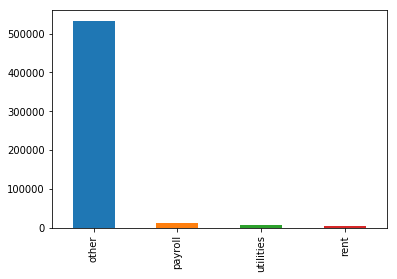

In [126]:
df['cat'].value_counts().plot('bar');

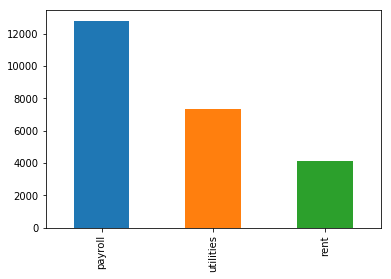

In [129]:
df[df.cat!='other'].cat.value_counts().plot('bar')